# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
  
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

#Define temperature units as Celsius
units = ["metric", "imperial"]

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    for unit in units: 
        city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

# #         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | riverton
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | derzhavinsk
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | necochea
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | lagoa
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | grande-riviere
City not found. Skipping...
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | acari
Processing Record 15 of Set 1 | high rock
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | sao felix do xingu
Processing Record 22 of Set 1 | shach

Processing Record 38 of Set 4 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 39 of Set 4 | sinkat
City not found. Skipping...
Processing Record 40 of Set 4 | khvoynaya
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | ust-kuyga
Processing Record 45 of Set 4 | tateyama
Processing Record 46 of Set 4 | nyurba
Processing Record 47 of Set 4 | mackay
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | pangnirtung
Processing Record 0 of Set 5 | kenai
Processing Record 1 of Set 5 | solnechnyy
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | barra patuca
Processing Record 4 of Set 5 | boljarovo
City not found. Skipping...
Processing Record 5 of Set 5 | umm bab
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | huarmey
Processing Record 8 of Set 5 | chuy
Processing Record 9 of Set 5 | d

Processing Record 21 of Set 8 | grand gaube
Processing Record 22 of Set 8 | meyungs
City not found. Skipping...
Processing Record 23 of Set 8 | verkhnyaya inta
Processing Record 24 of Set 8 | flin flon
Processing Record 25 of Set 8 | nigde
Processing Record 26 of Set 8 | inhambane
Processing Record 27 of Set 8 | lubao
Processing Record 28 of Set 8 | lakatoro
Processing Record 29 of Set 8 | saldanha
Processing Record 30 of Set 8 | saint-leu
Processing Record 31 of Set 8 | richards bay
Processing Record 32 of Set 8 | yekaterinovka
Processing Record 33 of Set 8 | quimper
Processing Record 34 of Set 8 | semnan
Processing Record 35 of Set 8 | saint-pacome
City not found. Skipping...
Processing Record 36 of Set 8 | rungata
City not found. Skipping...
Processing Record 37 of Set 8 | barawe
City not found. Skipping...
Processing Record 38 of Set 8 | tiznit
Processing Record 39 of Set 8 | torbay
Processing Record 40 of Set 8 | neiafu
Processing Record 41 of Set 8 | farah
Processing Record 42 of

Processing Record 4 of Set 12 | sasaram
Processing Record 5 of Set 12 | monrovia
Processing Record 6 of Set 12 | herouville-saint-clair
Processing Record 7 of Set 12 | gao
Processing Record 8 of Set 12 | onalaska
Processing Record 9 of Set 12 | kostomuksha
Processing Record 10 of Set 12 | bhum
Processing Record 11 of Set 12 | alliance
Processing Record 12 of Set 12 | ginda
Processing Record 13 of Set 12 | san ramon
Processing Record 14 of Set 12 | arinos
Processing Record 15 of Set 12 | tianpeng
Processing Record 16 of Set 12 | maumere
Processing Record 17 of Set 12 | korla
Processing Record 18 of Set 12 | gubkinskiy
Processing Record 19 of Set 12 | pierre
Processing Record 20 of Set 12 | harper
Processing Record 21 of Set 12 | fort-shevchenko
Processing Record 22 of Set 12 | tuy hoa
Processing Record 23 of Set 12 | mogok
Processing Record 24 of Set 12 | kahului
Processing Record 25 of Set 12 | tomelloso
Processing Record 26 of Set 12 | port hardy
Processing Record 27 of Set 12 | dulut

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Set the column order
city_data_df = city_data_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,riverton,40.5219,-111.9391,66.76,36,0,13.00,US,1681085630
1,yellowknife,62.4560,-114.3525,33.03,96,95,6.29,CA,1681085630
2,derzhavinsk,51.1000,66.3167,34.32,50,1,4.70,KZ,1681085630
3,hamilton,39.1834,-84.5333,58.60,37,0,10.36,US,1681085537
4,necochea,-38.5473,-58.7368,69.28,56,30,9.95,AR,1681085631


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,riverton,40.5219,-111.9391,66.76,36,0,13.00,US,1681085630
1,yellowknife,62.4560,-114.3525,33.03,96,95,6.29,CA,1681085630
2,derzhavinsk,51.1000,66.3167,34.32,50,1,4.70,KZ,1681085630
3,hamilton,39.1834,-84.5333,58.60,37,0,10.36,US,1681085537
4,necochea,-38.5473,-58.7368,69.28,56,30,9.95,AR,1681085631


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

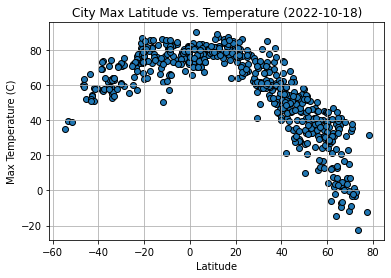

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

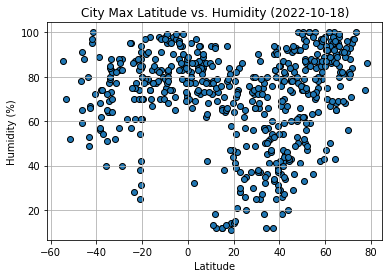

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

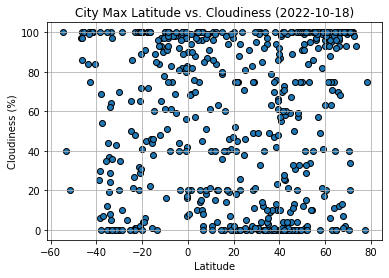

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

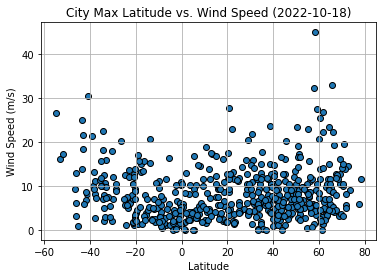

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


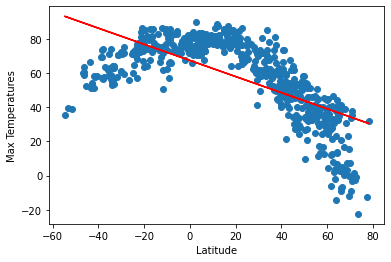

the r value is -0.6711943309594072


In [12]:
#Define x and y axes
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a scatter plot of x_values vs. y_values
plt.scatter(x_values, y_values)

# Calculate the predicted y values based on the linear regression line
y_predicted = slope * x_values + intercept

# Add the linear regression line to the scatter plot
plt.plot(x_values, y_predicted, color="red")

# Set the chart title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,riverton,40.5219,-111.9391,66.76,36,0,13.00,US,1681085630
1,yellowknife,62.4560,-114.3525,33.03,96,95,6.29,CA,1681085630
2,derzhavinsk,51.1000,66.3167,34.32,50,1,4.70,KZ,1681085630
3,hamilton,39.1834,-84.5333,58.60,37,0,10.36,US,1681085537
8,lagoa,39.0500,-27.9833,60.10,93,10,12.71,PT,1681085632


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,necochea,-38.5473,-58.7368,69.28,56,30,9.95,AR,1681085631
5,souillac,-20.5167,57.5167,76.41,88,100,8.81,MU,1681085631
6,bluff,-46.6000,168.3333,60.12,78,97,9.28,NZ,1681085632
7,hermanus,-34.4187,19.2345,56.80,77,37,22.44,ZA,1681085632
10,castro,-24.7911,-50.0119,60.10,95,50,5.55,BR,1681085633


###  Temperature vs. Latitude Linear Regression Plot

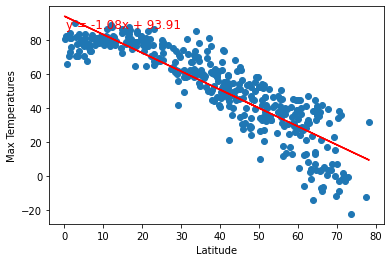

the r value is -0.8775824443413734


In [15]:
# Linear regression on Northern Hemisphere
#Define x and y axes
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a scatter plot of x_values vs. y_values
plt.scatter(x_values, y_values)

# Calculate the predicted y values based on the linear regression line
y_predicted = slope * x_values + intercept

# Add the linear regression line to the scatter plot
plt.plot(x_values, y_predicted, color="red")

# Set the chart title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures')

# Add the equation of the line to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

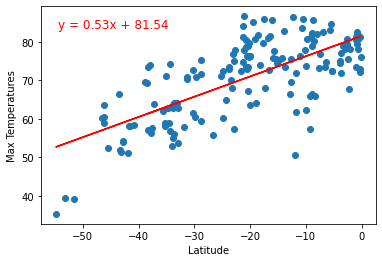

the r value is 0.707760351311227


In [16]:
# Linear regression on Southern Hemisphere
#Define x and y axes
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a scatter plot of x_values vs. y_values
plt.scatter(x_values, y_values)

# Calculate the predicted y values based on the linear regression line
y_predicted = slope * x_values + intercept

# Add the linear regression line to the scatter plot
plt.plot(x_values, y_predicted, color="red")

# Set the chart title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures')

# Add the equation of the line to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

**Discussion about the linear relationship:** In the northern hemisphere, the higher the latitudes values are, the lower the maximum temperatures are. The opposite happens in the southern hemisphere, the higher the latitudes values are, the higher the maximum temperatures are. Essentially, in the northern hemisphere, latitudes and maximum temperatures have an inverse relationship; therefore are negatively correlated. However, in the southern hemisphere, latitudes and maximum temperatures are positively correlated. 

### Humidity vs. Latitude Linear Regression Plot

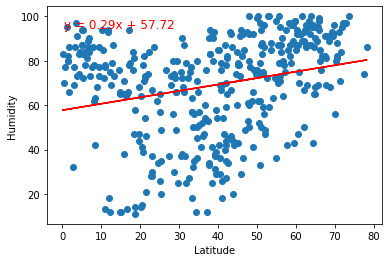

the r value is 0.2549876655345907


In [17]:
# Northern Hemisphere
#Define x and y axes
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a scatter plot of x_values vs. y_values
plt.scatter(x_values, y_values)

# Calculate the predicted y values based on the linear regression line
y_predicted = slope * x_values + intercept

# Add the linear regression line to the scatter plot
plt.plot(x_values, y_predicted, color="red")

# Set the chart title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Add the equation of the line to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

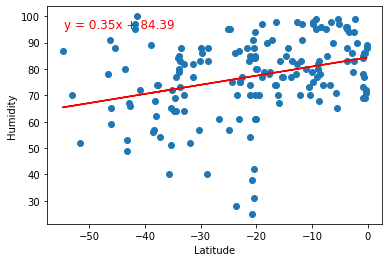

the r value is 0.3204182133538505


In [18]:
# Southern Hemisphere
#Define x and y axes
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a scatter plot of x_values vs. y_values
plt.scatter(x_values, y_values)

# Calculate the predicted y values based on the linear regression line
y_predicted = slope * x_values + intercept

# Add the linear regression line to the scatter plot
plt.plot(x_values, y_predicted, color="red")

# Set the chart title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Add the equation of the line to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

**Discussion about the linear relationship:** In the northern and southern hemispheres, the latitudes and humidity values are positively correlated. 

### Cloudiness vs. Latitude Linear Regression Plot

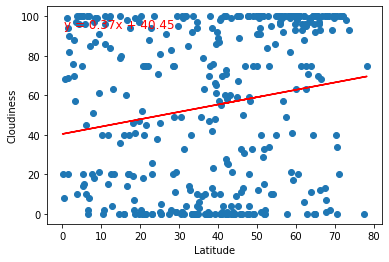

the r value is 0.1836538093642569


In [19]:
# Northern Hemisphere
#Define x and y axes
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a scatter plot of x_values vs. y_values
plt.scatter(x_values, y_values)

# Calculate the predicted y values based on the linear regression line
y_predicted = slope * x_values + intercept

# Add the linear regression line to the scatter plot
plt.plot(x_values, y_predicted, color="red")

# Set the chart title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Add the equation of the line to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

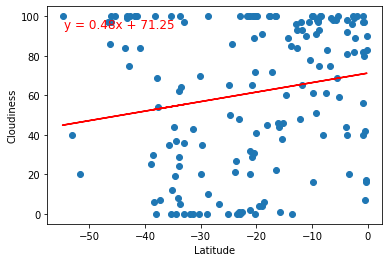

the r value is 0.17928307038206304


In [20]:
# Southern Hemisphere
#Define x and y axes
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a scatter plot of x_values vs. y_values
plt.scatter(x_values, y_values)

# Calculate the predicted y values based on the linear regression line
y_predicted = slope * x_values + intercept

# Add the linear regression line to the scatter plot
plt.plot(x_values, y_predicted, color="red")

# Set the chart title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Add the equation of the line to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

**Discussion about the linear relationship:** In the northern and southern hemispheres, the latitudes and cloudiness values are positively correlated. 

### Wind Speed vs. Latitude Linear Regression Plot

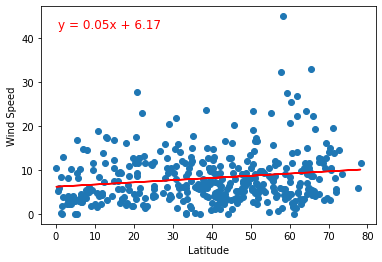

the r value is 0.1700769396334486


In [21]:
# Northern Hemisphere
#Define x and y axes
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a scatter plot of x_values vs. y_values
plt.scatter(x_values, y_values)

# Calculate the predicted y values based on the linear regression line
y_predicted = slope * x_values + intercept

# Add the linear regression line to the scatter plot
plt.plot(x_values, y_predicted, color="red")

# Set the chart title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Add the equation of the line to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

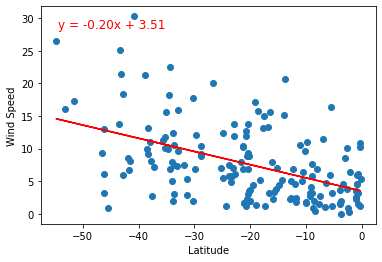

the r value is -0.4824615638565574


In [22]:
# Southern Hemisphere
#Define x and y axes
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a scatter plot of x_values vs. y_values
plt.scatter(x_values, y_values)

# Calculate the predicted y values based on the linear regression line
y_predicted = slope * x_values + intercept

# Add the linear regression line to the scatter plot
plt.plot(x_values, y_predicted, color="red")

# Set the chart title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Add the equation of the line to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

**Discussion about the linear relationship:** In the northern hemisphere, wind speed slightly increase with increases in latitudes values. The opposite happens in the southern hemisphere, the higher the latitudes values are, the lower wind speeds are. In the northern hemisphere, latitudes and wind speeds are positively correlated and, in the southern hemisphere, latitudes and wind speeds are negatively correlated. 